# Indian Hotel Reviews

![Gobibo](https://in.goibibo.com/static/extranet/images/mobile.png)

#### Problem Statement

* Given a set of Indian hotel reviews figure out if there is a way to predict ratings based on
  * Amenities.
  * Overall Ratings based on Specific Ratings.
  * Regional bias

#### Sample Data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
indian_hotels = pd.read_csv("data/goibibo_com-travel_sample.csv")

In [3]:
indian_hotels.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,24,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,https://www.goibibo.com/hotels/green-cottages-...,1.0,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,20,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,https://www.goibibo.com/hotels/delhi-continent...,121.0,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,goibibo,Delhi,0c3514344c9cda8718f558e84bdb44ef


*Source: https://www.kaggle.com/PromptCloudHQ/hotels-on-goibibo/data *

In [4]:
indian_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 36 columns):
additional_info             3192 non-null object
address                     4000 non-null object
area                        3965 non-null object
city                        4000 non-null object
country                     4000 non-null object
crawl_date                  4000 non-null object
guest_recommendation        2416 non-null float64
hotel_brand                 389 non-null object
hotel_category              4000 non-null object
hotel_description           3983 non-null object
hotel_facilities            3806 non-null object
hotel_star_rating           4000 non-null int64
image_count                 4000 non-null int64
latitude                    4000 non-null float64
locality                    3965 non-null object
longitude                   4000 non-null float64
pageurl                     4000 non-null object
point_of_interest           3760 non-null object
property_id

In [5]:
indian_hotels.describe()

,guest_recommendation,hotel_star_rating,image_count,latitude,longitude,room_count,site_review_count,site_review_rating
count,2416.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,2416.000000,2416.000000
mean,75.537666,1.306000,12.995500,21.288213,77.432995,22.200250,47.765728,3.750993
std,22.698935,1.479159,11.631113,7.576905,4.506588,96.132138,93.233924,0.842863
min,0.000000,0.000000,0.000000,8.080476,12.939682,0.000000,0.000000,0.000000
25%,67.000000,0.000000,6.000000,13.748553,74.723694,7.000000,4.000000,3.400000
50%,80.000000,1.000000,9.000000,22.225083,76.967365,14.000000,17.000000,3.900000
75%,90.000000,3.000000,17.000000,28.018203,78.286097,26.000000,55.000000,4.300000
max,100.000000,5.000000,129.000000,79.608077,95.346775,5874.000000,2094.000000,5.000000


#### Data Correlation

In [6]:
corr_mat = indian_hotels.corr()

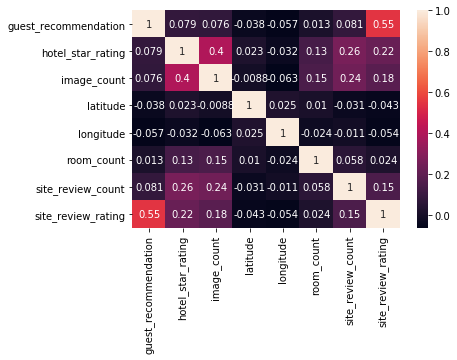

In [7]:
sns.heatmap(corr_mat, annot=True)

In [8]:
indian_hotels.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id'],
      dtype='object')

###### Understand the data a bit more!

In [9]:
#Trying to understand some of the columns that are missing from head() output
indian_hotels[['locality', 'point_of_interest', 'hotel_facilities', 'property_type', 'province', 'qts', 'room_facilities', 'room_type', 'state']].head()

,locality,point_of_interest,hotel_facilities,property_type,province,qts,room_facilities,room_type,state
0,Others,Hadimba Temple|Naggar Village|Himalayan Nyingm...,Doctor on Call|Dry Cleaning|Laundry Service Av...,Resort,Manali,2016-07-24 01:12:30 +0000,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,Himachal Pradesh
1,Sushant Lok,Sushant Lok|Sahara Mall|Amity International Sc...,Airport Transfer Available / Surcharge|Banquet...,Guest House,Gurgaon,2016-07-24 01:12:30 +0000,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,Haryana
2,Calangute Area,"Anjuna Beach|Calangute Beach|Titos lane, baga|...",Swimming Pool|Bar / Lounge |Laundry Service Av...,Resort,Goa,2016-07-24 01:12:30 +0000,Room Service |Air Conditioning |Cable / Satell...,Standard Room,Goa
3,Village Simsa,The Mall|Tibetian Monastery|Vashisht Hot Baths...,Doctor on Call|Dry Cleaning|Laundry Service Av...,Cottage,Manali,2016-07-24 01:12:30 +0000,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,Himachal Pradesh
4,Paharganj,Gaffar Market|YMCA Institute|Agrasen Boali|Cha...,Internet Access - Surcharge|Laundry Service Av...,Hotel,Delhi,2016-07-24 01:12:30 +0000,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,Delhi


In [10]:
#What are the different property types
indian_hotels.property_type.value_counts()

Hotel                2314
Resort                516
Guest House           243
Homestay              231
Service Apartment     183
Lodge                 117
Houseboat              78
Cottage                75
Tent                   57
Villa                  49
BnB                    49
Bungalow               46
Palace                 11
Hostel                 10
Motel                   9
Farm Stay               7
Luxury Yacht            3
Beach Hut               2
Name: property_type, dtype: int64

In [11]:
#Need to convert state to a standard format
indian_hotels['state'] = indian_hotels.state.str.title()

In [12]:
#Now we can take a count of the states
indian_hotels.state.value_counts()

Maharashtra                    457
Karnataka                      373
Kerala                         348
Rajasthan                      329
Tamil Nadu                     272
Himachal Pradesh               222
Goa                            222
Uttarakhand                    203
Uttar Pradesh                  178
Andhra Pradesh                 167
Madhya Pradesh                 159
Gujarat                        155
Haryana                        150
West Bengal                    144
Delhi                          137
Jammu And Kashmir              125
Punjab                          87
Sikkim                          63
Orissa                          44
Bihar                           34
Jharkhand                       28
Assam                           22
Andaman And Nicobar Islands     21
Chhattisgarh                    20
Pondicherry                     14
Meghalaya                        9
Mizoram                          4
Dadra And Nagar Haveli           4
Nagaland            

In [13]:
indian_hotels.room_type.value_counts()

Deluxe Room                                                               683
Standard Room                                                             366
Deluxe                                                                     98
Executive Room                                                             90
Super Deluxe Room                                                          81
Standard                                                                   44
Superior Room                                                              44
AC Room                                                                    38
Suite Room                                                                 36
STANDARD ROOM                                                              35
Deluxe room                                                                31
Premium Room                                                               31
Deluxe AC Room                                                  

In [14]:
indian_hotels.hotel_facilities.head()

0    Doctor on Call|Dry Cleaning|Laundry Service Av...
1    Airport Transfer Available / Surcharge|Banquet...
2    Swimming Pool|Bar / Lounge |Laundry Service Av...
3    Doctor on Call|Dry Cleaning|Laundry Service Av...
4    Internet Access - Surcharge|Laundry Service Av...
Name: hotel_facilities, dtype: object

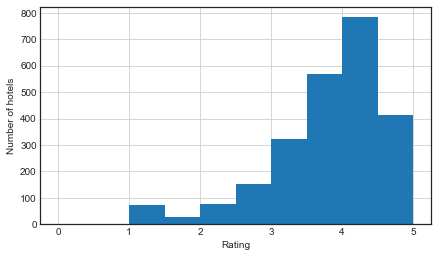

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

f, axarr = plt.subplots(1, 1, figsize=(7, 4))
f.subplots_adjust(hspace=1)
plt.xlabel('Rating')
plt.ylabel('Number of hotels')
indian_hotels.site_review_rating.hist()

f.savefig('assets/rating_distribution.png')

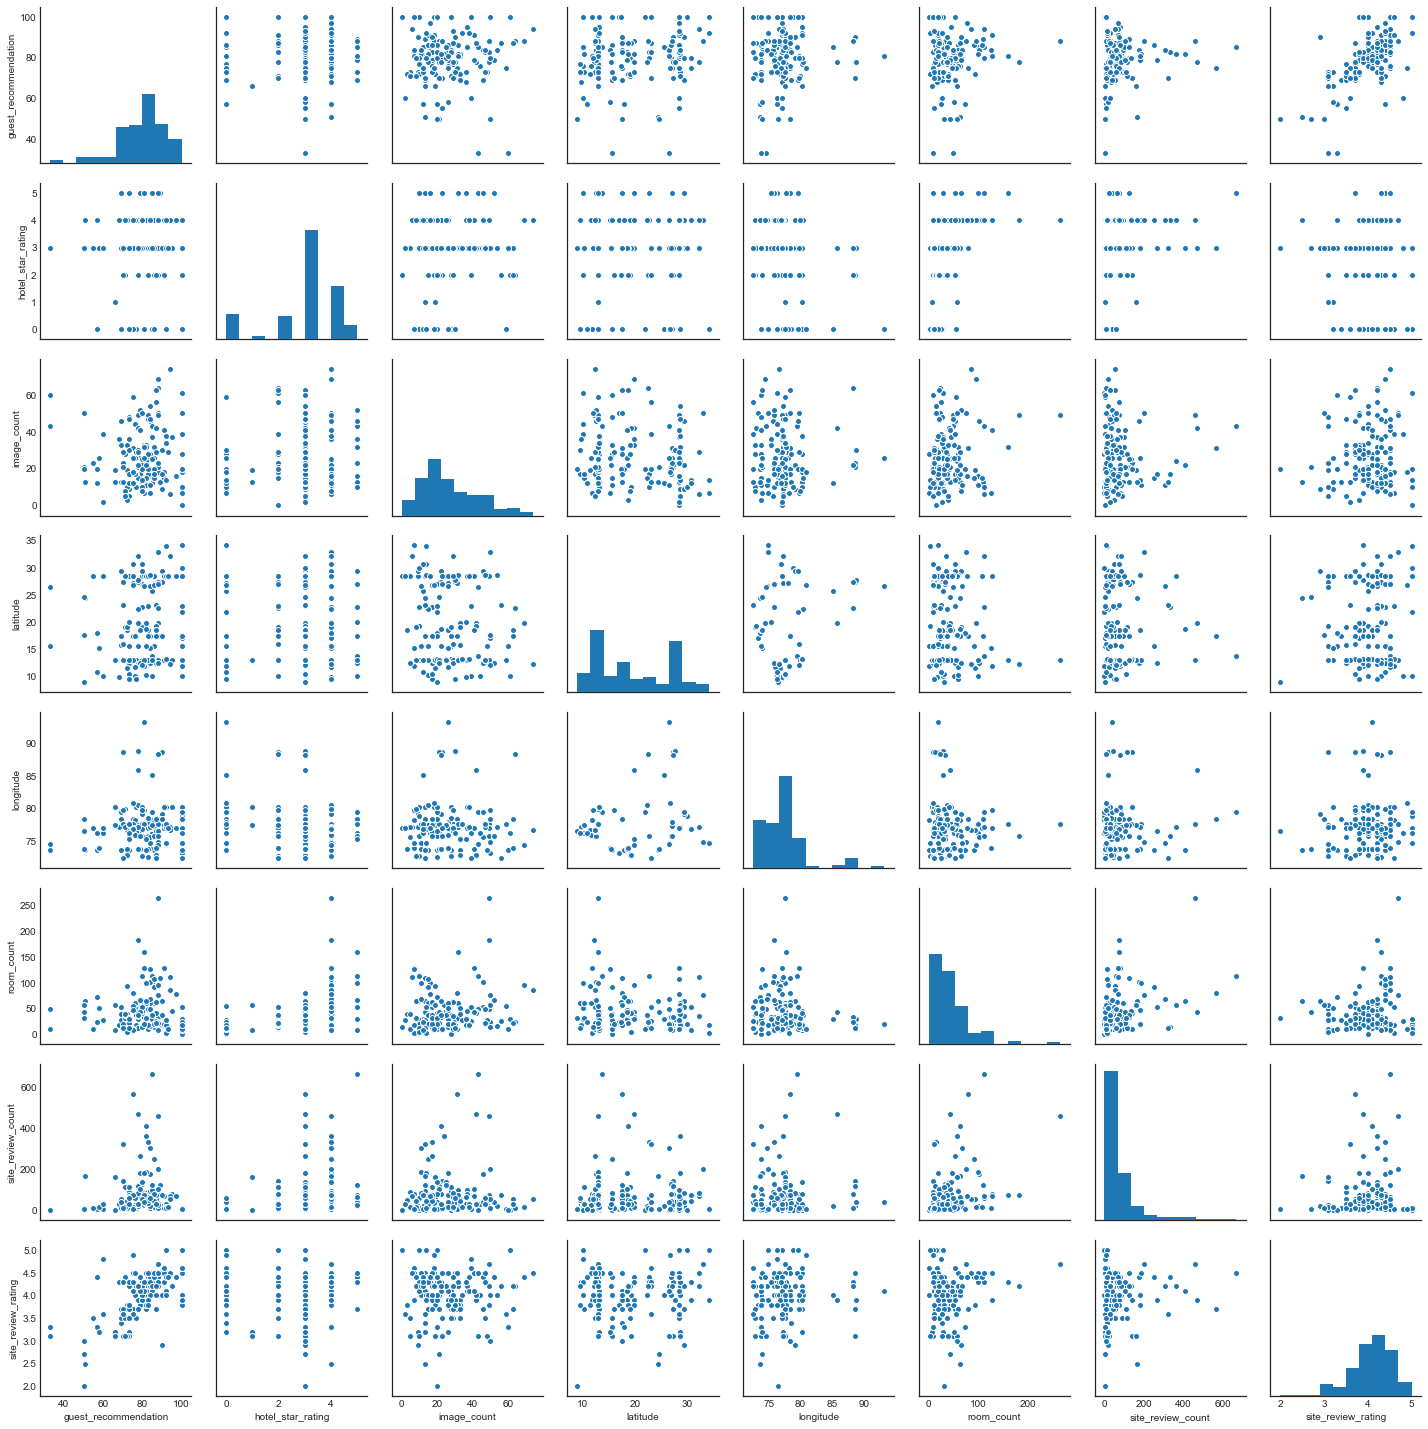

In [16]:
sns.pairplot(indian_hotels.dropna())

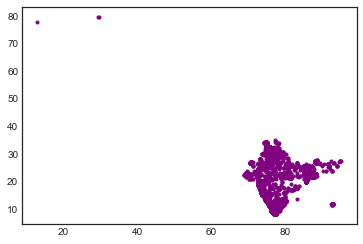

In [17]:
import matplotlib.pyplot as plt
plt.scatter(indian_hotels['longitude'], indian_hotels['latitude'], marker='.', color="purple")

In [18]:
indian_hotels[indian_hotels['longitude'] < 60 ]

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
730,NaN,"Nathuakhan, Nainital",Others,Nainital,India,2016-08-07,NaN,NaN,regular,The standard check-in time is 12:30 PM and the...,...,4,Room Service |Alarm Clock|Ceiling Fan|Attached...,Front Valley &amp; Hill View Room,https://www.goibibo.com/hotels/prim-resorts---...,NaN,NaN,Service Quality::|Amenities::|Food and Drinks:...,goibibo,Uttarakhand,2da19ad959cc4029e6489baa1b716633
1001,Room Service|Free Internet,"#79,DVG Road Basavangudi (Next to Upahara Dars...",Jayanagar,Bangalore,India,2016-07-03,78.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,41,Basic Bathroom Amenities|Telephone| Hot / Cold...,Standard Non A/c,NaN,61.0,3.4,Service Quality::3.3|Amenities::3.3|Food and D...,goibibo,Karnataka,13e9c113a60f50694e0550df6b92949f
3554,Room Service|Internet Access|Gym/Spa|Restaurant,"Kalika Estate, Dadgallia, Ranikhet",Almora Ranikhet Road,Ranikhet,India,2016-08-21,100.0,WelcomHeritage,regular,The standard check-in time is 12:00 PM and the...,...,25,Balcony / Terrace|Basic Bathroom Amenities|Cab...,Deluxe Room,https://www.goibibo.com/hotels/ranikhet-inn-ho...,14.0,4.1,Service Quality::3.9|Amenities::4.0|Food and D...,goibibo,Uttarakhand,73dd49c6ec0e3cb03b6c1d34a2a17bea


In [19]:
indian_hotels_filtered = indian_hotels[indian_hotels['longitude'] > 60 ]

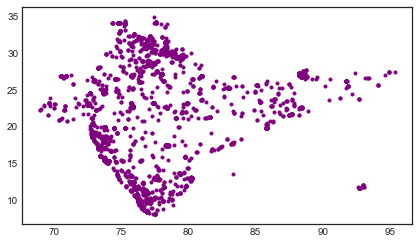

In [20]:
f, axarr = plt.subplots(1, 1, figsize=(7, 4))
f.subplots_adjust(hspace=1)

plt.scatter(indian_hotels_filtered['longitude'], indian_hotels_filtered['latitude'], marker='.', color="purple")

f.savefig('assets/hotel_regional_distribution.png')

*From above map, the data is a good representation of the Indian regions.*

In [21]:
indian_hotels.site_review_rating.kurt(skipna=True)

1.966481043201593

#### Feature engineering for specific ratings

In [22]:
indian_hotels['additional_info'].head()

0    Room Service|Internet Access|Restaurant|Free I...
1                                 Room Service|Gym/Spa
2                             Restaurant|Swimming Pool
3                                                  NaN
4                           Internet Access|Restaurant
Name: additional_info, dtype: object

In [23]:
amenities = indian_hotels['additional_info'].str.split('|',expand=True)

In [24]:
stay_review_rating = indian_hotels['site_stay_review_rating'].str.split('|', expand=True)

In [25]:
stay_review_rating.head()

,0,1,2,3,4,5
0,Service Quality::3.9,Amenities::3.7,Food and Drinks::3.8,Value for Money::4.1,Location::4.0,Cleanliness::4.1
1,Service Quality::4.7,Amenities::4.7,Food and Drinks::4.3,Value for Money::4.7,Location::4.8,Cleanliness::4.8
2,Service Quality::2.5,Amenities::2.5,Food and Drinks::1.0,Value for Money::2.5,Location::2.5,Cleanliness::1.0
3,Service Quality::5.0,Amenities::5.0,Food and Drinks::5.0,Value for Money::5.0,Location::5.0,Cleanliness::5.0
4,Service Quality::2.7,Amenities::2.6,Food and Drinks::2.5,Value for Money::2.9,Location::2.9,Cleanliness::2.6


In [26]:
stay_review_rating = stay_review_rating.rename(index = str, columns={0:"Service_Quality", 1: "Amenities", 2: "Food_and_Drinks", 3: "Value_for_Money", 4: "Location", 5: "Cleaniness"})

In [27]:
stay_review_rating.columns[0]

'Service_Quality'

In [28]:
stay_review_rating['Service_Quality'] = stay_review_rating['Service_Quality'].str.split('::').str[-1]
stay_review_rating['Amenities'] = stay_review_rating['Amenities'].str.split('::').str[-1]
stay_review_rating['Food_and_Drinks'] = stay_review_rating['Food_and_Drinks'].str.split('::').str[-1]
stay_review_rating['Value_for_Money'] = stay_review_rating['Value_for_Money'].str.split('::').str[-1]
stay_review_rating['Location'] = stay_review_rating['Location'].str.split('::').str[-1]
stay_review_rating['Cleaniness'] = stay_review_rating['Cleaniness'].str.split('::').str[-1]
stay_review_rating.head()

,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,3.9,3.7,3.8,4.1,4.0,4.1
1,4.7,4.7,4.3,4.7,4.8,4.8
2,2.5,2.5,1.0,2.5,2.5,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0
4,2.7,2.6,2.5,2.9,2.9,2.6


In [29]:
stay_review_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 6 columns):
Service_Quality    4000 non-null object
Amenities          4000 non-null object
Food_and_Drinks    4000 non-null object
Value_for_Money    4000 non-null object
Location           4000 non-null object
Cleaniness         4000 non-null object
dtypes: object(6)
memory usage: 218.8+ KB


In [30]:
stay_review_rating_clean = stay_review_rating.dropna().astype('float', errors='ignore') 
stay_review_rating_clean['Service_Quality'] = pd.to_numeric(stay_review_rating['Service_Quality'], errors='coerce')
stay_review_rating_clean['Amenities'] = pd.to_numeric(stay_review_rating['Amenities'], errors='coerce')
stay_review_rating_clean['Food_and_Drinks'] = pd.to_numeric(stay_review_rating['Food_and_Drinks'], errors='coerce')
stay_review_rating_clean['Value_for_Money'] = pd.to_numeric(stay_review_rating['Value_for_Money'], errors='coerce')
stay_review_rating_clean['Location'] = pd.to_numeric(stay_review_rating['Location'], errors='coerce')
stay_review_rating_clean['Cleaniness'] = pd.to_numeric(stay_review_rating['Cleaniness'], errors='coerce')


In [31]:
stay_review_rating_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 6 columns):
Service_Quality    2416 non-null float64
Amenities          2416 non-null float64
Food_and_Drinks    2416 non-null float64
Value_for_Money    2416 non-null float64
Location           2416 non-null float64
Cleaniness         2416 non-null float64
dtypes: float64(6)
memory usage: 218.8+ KB


In [32]:
stay_review_rating_clean.head()

,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,3.9,3.7,3.8,4.1,4.0,4.1
1,4.7,4.7,4.3,4.7,4.8,4.8
2,2.5,2.5,1.0,2.5,2.5,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0
4,2.7,2.6,2.5,2.9,2.9,2.6


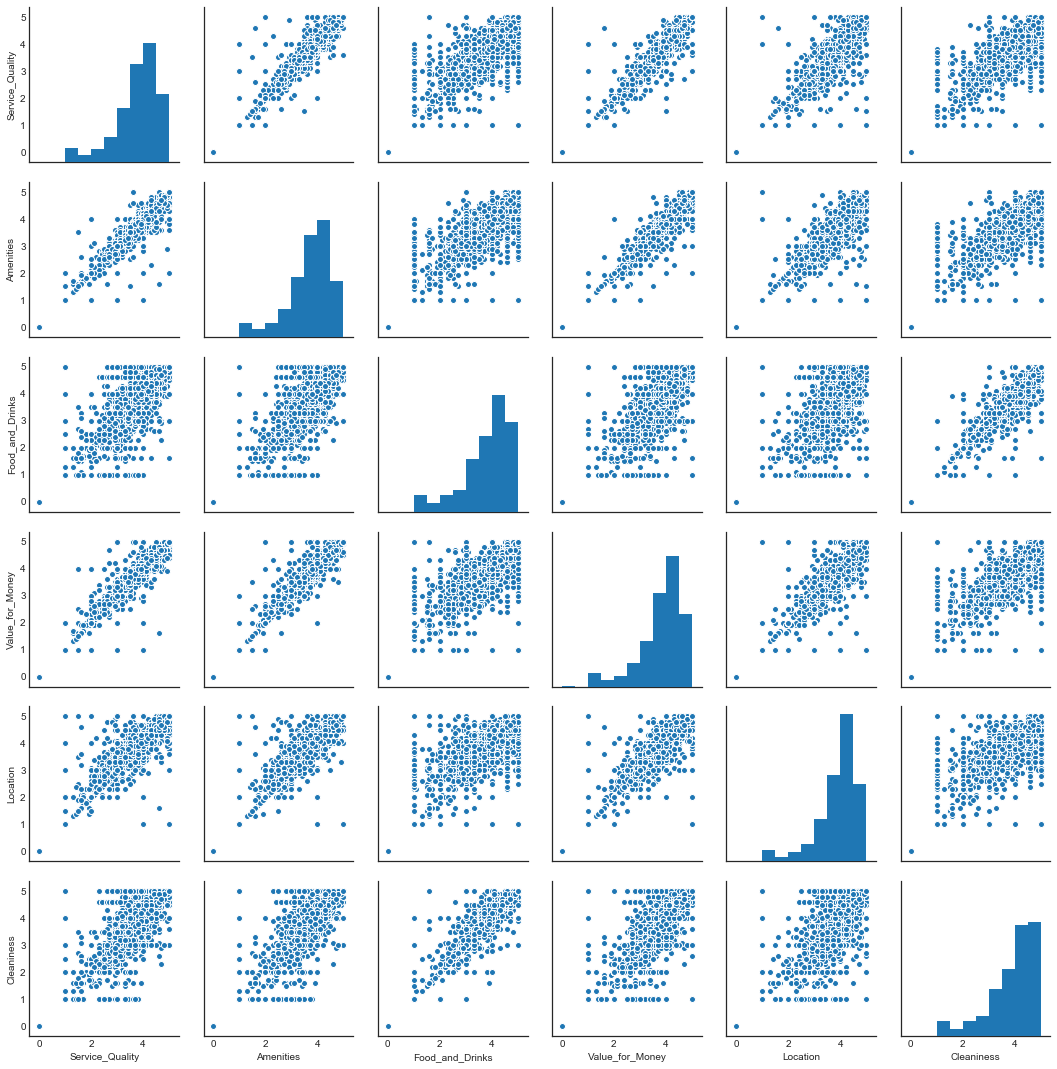

In [33]:
sns.pairplot(stay_review_rating_clean.dropna())

#### Feature engineering for Amenities

In [34]:
import itertools

hotels = indian_hotels

top_amenities = pd.Series(
    list(itertools.chain(*hotels['room_facilities']\
                             .fillna("")\
                             .map(lambda f: [am.strip() for am in f.split("|")])\
                             .values\
                             .tolist()))).value_counts().head(12).index.values
temp = hotels.assign(amenities=hotels['room_facilities'].fillna("").map(
        lambda f: [am.strip() for am in f.split("|")]))

for amenity in top_amenities:
    temp[amenity] = temp.amenities.map(lambda l: amenity in l)

In [35]:
temp.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id', 'amenities',
       'Room Service', 'Basic Bathroom Amenities', 'Hot / Cold Running Water',
       'Housekeeping', 'Ceiling Fan', 'Air Conditioning',
       'Cable / Satellite / Pay TV available', 'Attached Bathroom',
       'Telephone', 'Mirror', 'TV', 'Desk in Room'],
      dtype='object')

In [36]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 49 columns):
additional_info                         3192 non-null object
address                                 4000 non-null object
area                                    3965 non-null object
city                                    4000 non-null object
country                                 4000 non-null object
crawl_date                              4000 non-null object
guest_recommendation                    2416 non-null float64
hotel_brand                             389 non-null object
hotel_category                          4000 non-null object
hotel_description                       3983 non-null object
hotel_facilities                        3806 non-null object
hotel_star_rating                       4000 non-null int64
image_count                             4000 non-null int64
latitude                                4000 non-null float64
locality                                

In [37]:
temp.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Hot / Cold Running Water,Housekeeping,Ceiling Fan,Air Conditioning,Cable / Satellite / Pay TV available,Attached Bathroom,Telephone,Mirror,TV,Desk in Room
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,True,True,True,False,True,True,True,True,True,True
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,True,True,True,True,True,True,True,False
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,True,True,True,True,True,True,False,True
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,False,False,False,True,False,True,False,False,False
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,False,False,False,True,False,True,True,False,False


In [38]:
list(itertools.chain(*hotels['room_facilities']\
                             .fillna("")\
                             .map(lambda f: [am.strip() for am in f.split("|")])\
                             .values\
                             .tolist()))

['Room Service',
 'Basic Bathroom Amenities',
 'Cable / Satellite / Pay TV available',
 'Ceiling Fan',
 'Heating Facility (on request)',
 'Internet Connection In Room',
 'Telephone',
 'Shower Facility Available',
 'Breakfast Available (surcharge)',
 'Hot / Cold Running Water',
 'Housekeeping',
 'Desk in Room',
 'Extra Bed, Towels, Linens, Bedding (on request)',
 'Window Opens',
 'Makeup / Shaving Mirror',
 'Safe - In - Room',
 'Hill View from all Rooms',
 'HD / LCD Satellite TV',
 'Sofa Table / Extra Seats',
 'Private Garden',
 'TV',
 'Bathrobes',
 'Mirror',
 'Gas Cylinder - Chargeable',
 'Luggage Rack',
 'Attached Bathroom',
 'Bedside Table',
 'Clothes Hook in Bathroom',
 'Complete Bedding',
 'Daily Room Cleaning',
 'Dustbins',
 'Extra Toilteries on Demand',
 'Modern Toilet Facilities',
 'Room Door Fitted with Lock and Key',
 'Room with Window/Ventilation',
 'Rooms with Attached Bathrooms',
 'Sufficient Lighting',
 'Western Toilet Seat',
 'Breakfast chargeable',
 'Room Service',
 'Air

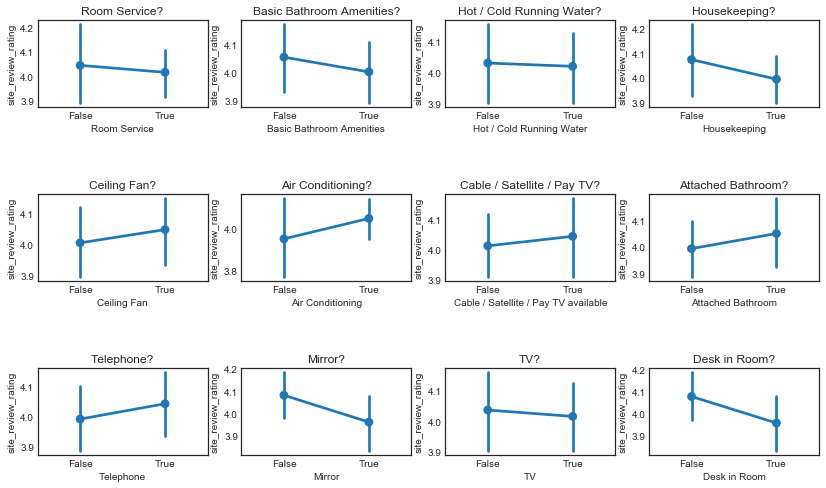

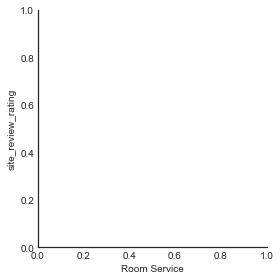

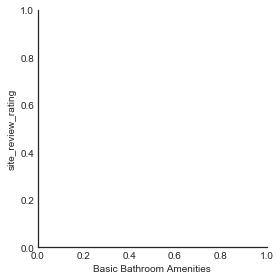

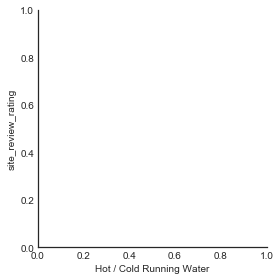

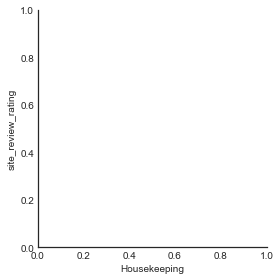

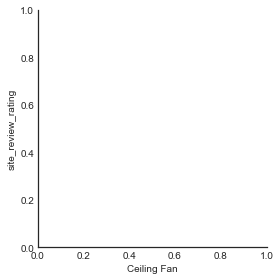

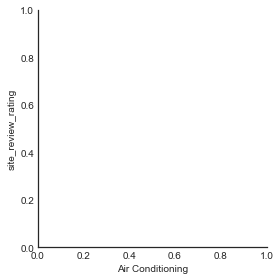

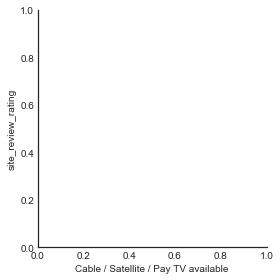

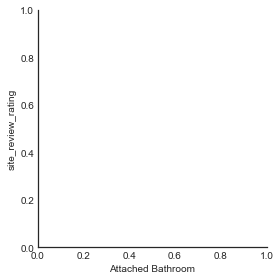

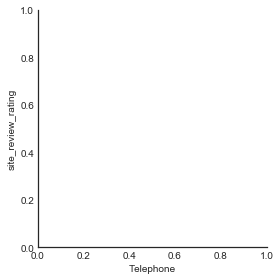

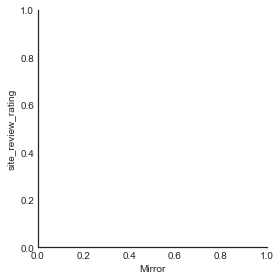

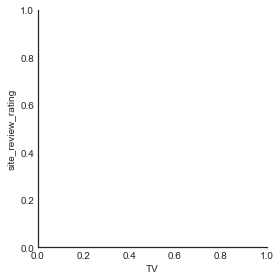

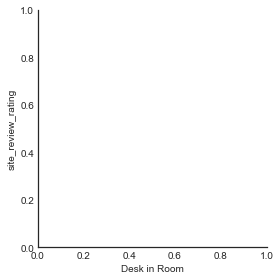

In [39]:

f, axarr = plt.subplots(3, 4, figsize=(14, 8))
f.subplots_adjust(hspace=1)

sns.factorplot(x='Room Service', y='site_review_rating', data=temp.dropna(), ax=axarr[0][0])
axarr[0][0].set_title("Room Service?")

sns.factorplot(x='Basic Bathroom Amenities', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[0][1])
axarr[0][1].set_title("Basic Bathroom Amenities?")

sns.factorplot(x='Hot / Cold Running Water', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[0][2])
axarr[0][2].set_title("Hot / Cold Running Water?")

sns.factorplot(x='Housekeeping', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[0][3])
axarr[0][3].set_title("Housekeeping?")

sns.factorplot(x='Ceiling Fan', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Ceiling Fan?")

sns.factorplot(x='Air Conditioning', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][1])
axarr[1][1].set_title("Air Conditioning?")

sns.factorplot(x='Cable / Satellite / Pay TV available', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][2])
axarr[1][2].set_title("Cable / Satellite / Pay TV?")

sns.factorplot(x='Attached Bathroom', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][3])
axarr[1][3].set_title("Attached Bathroom?")

sns.factorplot(x='Telephone', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][0])
axarr[2][0].set_title("Telephone?")

sns.factorplot(x='Mirror', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][1])
axarr[2][1].set_title("Mirror?")

sns.factorplot(x='TV', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][2])
axarr[2][2].set_title("TV?")

sns.factorplot(x='Desk in Room', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][3])
axarr[2][3].set_title("Desk in Room?")

f.savefig('assets/amenities_corr_to_rating.png')

![Image of Amenities](amenities_corr_to_rating.png)

In [40]:
import itertools

hotels = indian_hotels

hotel_amenities = pd.Series(
    list(itertools.chain(*hotels['hotel_facilities']\
                             .fillna("")\
                             .map(lambda f: [am.strip() for am in f.split("|")])\
                             .values\
                             .tolist()))).value_counts().head(12).index.values
temp_hotel_amenities = hotels.assign(amenities=hotels['hotel_facilities'].fillna("").map(
        lambda f: [am.strip() for am in f.split("|")]))

for hotel_amenity in hotel_amenities:
    temp_hotel_amenities[hotel_amenity] = temp_hotel_amenities.amenities.map(lambda l: hotel_amenity in l)

In [41]:
temp_hotel_amenities.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id', 'amenities',
       'Front Desk', 'Doctor on Call', 'Parking Facilities Available',
       'Laundry Service Available', 'Parking Facility', 'Power Backup',
       'Room Service', '24 Hour Front Desk', 'Room Service (24 Hours)',
       'Lobby', 'Multi Cuisine Restaurant', 'Newspapers In Lobby'],
      dtype='object')

In [42]:
temp_hotel_amenities[temp_hotel_amenities['Front Desk']]

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Parking Facilities Available,Laundry Service Available,Parking Facility,Power Backup,Room Service,24 Hour Front Desk,Room Service (24 Hours),Lobby,Multi Cuisine Restaurant,Newspapers In Lobby
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,False,True,False,True,False,True,False,False
5,Room Service|Internet Access,"Baga Beach, Calangute, Goa",Baga Area,Goa,India,2016-07-24,68.0,NaN,regular,The standard check-in time is 02:00 PM and the...,...,True,True,False,True,False,True,True,True,False,True
6,Free Internet,"K-69, Kalkaji",Kalkaji,Delhi,India,2016-07-24,NaN,NaN,regular,The standard check-in time is 12:00 PM and the...,...,False,False,False,True,False,False,False,True,False,True
7,Room Service|Internet Access|Restaurant|Free I...,"2638-2642 Gurudwara Road,Karol Bagh",Karol Bagh Area,Delhi,India,2016-07-24,76.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,True,True,True,True,True,True,True,True,True,True
8,NaN,"85, gomes defence, III rd Avenue, vaishali nag...",Others,Jaipur,India,2016-07-24,0.0,NaN,regular,The standard check-in time is 02:00 PM and the...,...,False,False,False,False,False,False,False,True,False,False
9,NaN,51 Amri Nagar south ex,South Extension,Delhi,India,2016-07-24,NaN,NaN,regular,The standard check-in time is 02:00 PM and the...,...,False,False,False,False,False,True,False,False,False,False
11,Room Service|Internet Access|Free Internet,"Near Botanical Garden Metro Station,Sec - 46",Others,NOIDA,India,2016-07-24,NaN,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,False,True,True,False,True,True,True,False,True
12,Room Service|Free Internet,"429, Sector-6, Rohini, Near Vidha Jain Public ...",Rohini,Delhi,India,2016-07-24,NaN,NaN,regular,The standard check-in time is 02:00 PM and the...,...,True,False,True,True,True,False,False,False,False,False
13,NaN,"Village Gurdorh, Naggar Road, Manali,Distt. Ku...",Naggar Road,Manali,India,2016-07-24,NaN,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,False,False,False,False,True,False,True,False,False
15,Room Service|Internet Access|Free Internet,"Plot No:2,Elcot Avenue,Rajiv Gandhi Road,(OMR)...",Thuraipakkam,Chennai,India,2016-07-24,67.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,False,True,False,False,True,False,False,False


Text(0.5,1,'Newspapers In Lobby?')

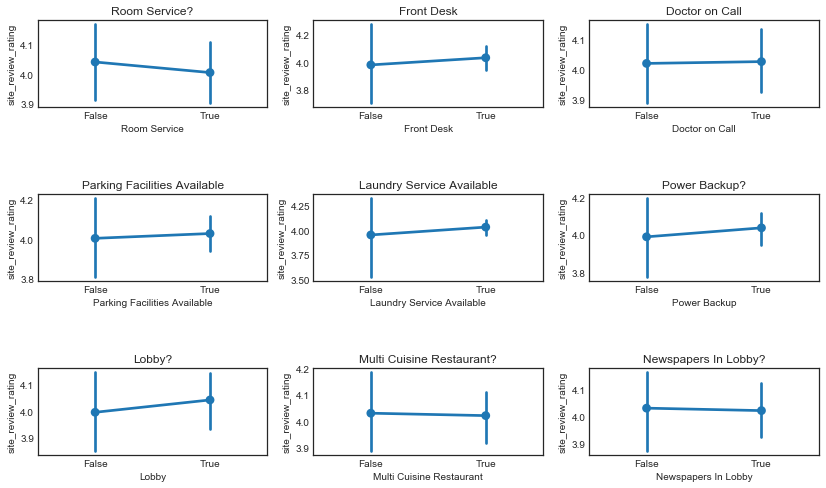

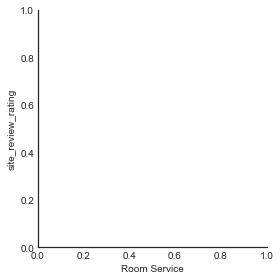

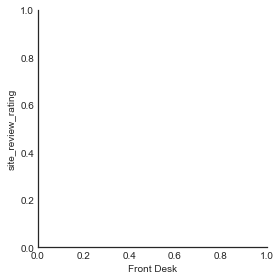

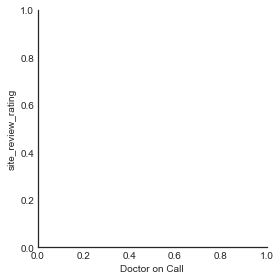

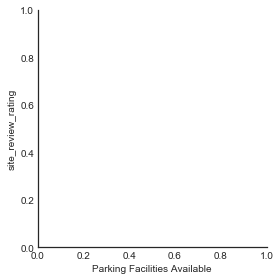

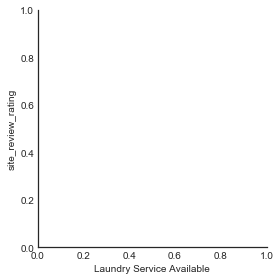

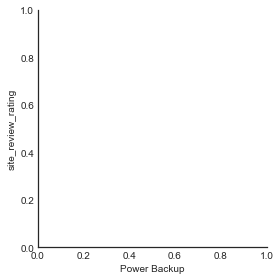

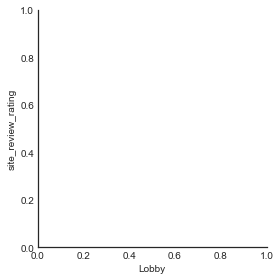

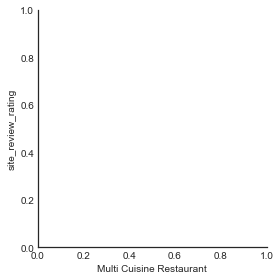

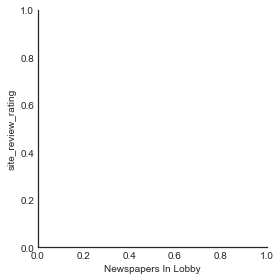

In [43]:
f, axarr = plt.subplots(3, 3, figsize=(14, 8))
f.subplots_adjust(hspace=1)

sns.factorplot(x='Room Service', y='site_review_rating', data=temp_hotel_amenities.dropna(), ax=axarr[0][0])
axarr[0][0].set_title("Room Service?")

sns.factorplot(x='Front Desk', y='site_review_rating', 
               data=temp_hotel_amenities.dropna(), ax=axarr[0][1])
axarr[0][1].set_title("Front Desk")

sns.factorplot(x='Doctor on Call', y='site_review_rating', 
               data=temp_hotel_amenities.dropna(), ax=axarr[0][2])
axarr[0][2].set_title("Doctor on Call")

sns.factorplot(x='Parking Facilities Available', y='site_review_rating', 
               data=temp_hotel_amenities.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Parking Facilities Available")

sns.factorplot(x='Laundry Service Available', y='site_review_rating', 
               data=temp_hotel_amenities.dropna(), ax=axarr[1][1])
axarr[1][1].set_title("Laundry Service Available")

sns.factorplot(x='Power Backup', y='site_review_rating', 
               data=temp_hotel_amenities.dropna(), ax=axarr[1][2])
axarr[1][2].set_title("Power Backup?")

sns.factorplot(x='Lobby', y='site_review_rating', 
               data=temp_hotel_amenities.dropna(), ax=axarr[2][0])
axarr[2][0].set_title("Lobby?")

sns.factorplot(x='Multi Cuisine Restaurant', y='site_review_rating', 
               data=temp_hotel_amenities.dropna(), ax=axarr[2][1])
axarr[2][1].set_title("Multi Cuisine Restaurant?")

sns.factorplot(x='Newspapers In Lobby', y='site_review_rating', 
               data=temp_hotel_amenities.dropna(), ax=axarr[2][2])
axarr[2][2].set_title("Newspapers In Lobby?")

In [44]:
temp_hotel_amenities.drop('Room Service', axis=1, inplace=True)

In [45]:
list(itertools.chain(*hotels['additional_info']\
                             .fillna("")\
                             .map(lambda f: [am.strip() for am in f.split("|")])\
                             .values\
                             .tolist()))

['Room Service',
 'Internet Access',
 'Restaurant',
 'Free Internet',
 'Room Service',
 'Gym/Spa',
 'Restaurant',
 'Swimming Pool',
 '',
 'Internet Access',
 'Restaurant',
 'Room Service',
 'Internet Access',
 'Free Internet',
 'Room Service',
 'Internet Access',
 'Restaurant',
 'Free Internet',
 '',
 '',
 'Room Service',
 'Free Internet',
 'Room Service',
 'Internet Access',
 'Free Internet',
 'Room Service',
 'Free Internet',
 '',
 '',
 'Room Service',
 'Internet Access',
 'Free Internet',
 'Room Service',
 'Internet Access',
 'Room Service',
 'Room Service',
 'Free Internet',
 '',
 'Room Service',
 'Free Internet',
 'Room Service',
 'Room Service',
 'Restaurant',
 'Room Service',
 'Restaurant',
 'Room Service',
 'Restaurant',
 'Free Internet',
 '',
 'Room Service',
 'Free Internet',
 '',
 'Room Service',
 'Internet Access',
 'Room Service',
 'Internet Access',
 'Free Internet',
 'Room Service',
 'Internet Access',
 'Restaurant',
 'Free Internet',
 'Room Service',
 'Internet Access',

In [46]:
import itertools

hotels = indian_hotels

info_amenities = pd.Series(
    list(itertools.chain(*hotels['additional_info']\
                             .fillna("")\
                             .map(lambda f: [am.strip() for am in f.split("|")])\
                             .values\
                             .tolist()))).value_counts().head(12).index.values
temp_info_amenities = hotels.assign(amenities=hotels['additional_info'].fillna("").map(
        lambda f: [am.strip() for am in f.split("|")]))

for info_amenity in info_amenities:
    temp_info_amenities[info_amenity] = temp_info_amenities.amenities.map(lambda l: info_amenity in l)

In [47]:
temp_info_amenities.drop(['', 'Room Service'], axis=1, inplace=True)

In [48]:
temp_info_amenities.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,site_stay_review_rating,sitename,state,uniq_id,amenities,Restaurant,Internet Access,Free Internet,Swimming Pool,Gym/Spa
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983,"[Room Service, Internet Access, Restaurant, Fr...",True,True,True,False,False
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de,"[Room Service, Gym/Spa]",False,False,False,False,True
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83,"[Restaurant, Swimming Pool]",True,False,False,True,False
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5,[],False,False,False,False,False
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,Service Quality::2.7|Amenities::2.6|Food and D...,goibibo,Delhi,0c3514344c9cda8718f558e84bdb44ef,"[Internet Access, Restaurant]",True,True,False,False,False


Text(0.5,1,'Gym/Spa?')

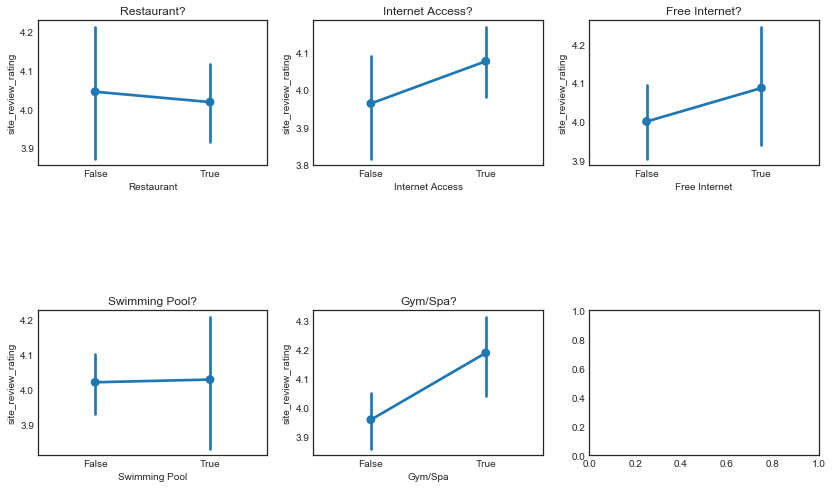

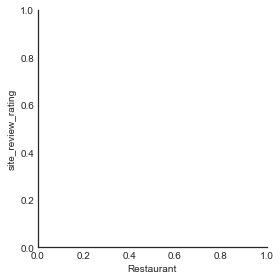

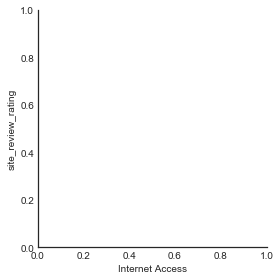

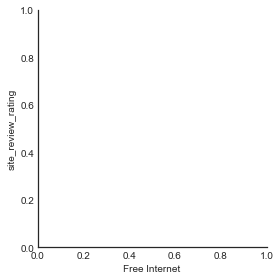

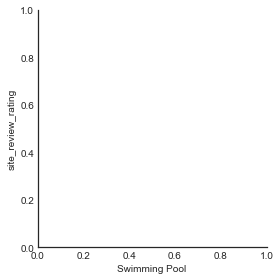

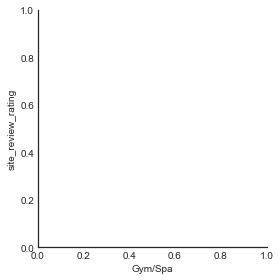

In [49]:
sns.set_style("white")

f, axarr = plt.subplots(2, 3, figsize=(14, 8))
f.subplots_adjust(hspace=1)

sns.factorplot(x='Restaurant', y='site_review_rating', data=temp_info_amenities.dropna(), ax=axarr[0][0])
axarr[0][0].set_title("Restaurant?")

sns.factorplot(x='Internet Access', y='site_review_rating', 
               data=temp_info_amenities.dropna(), ax=axarr[0][1])
axarr[0][1].set_title("Internet Access?")

sns.factorplot(x='Free Internet', y='site_review_rating', 
               data=temp_info_amenities.dropna(), ax=axarr[0][2])
axarr[0][2].set_title("Free Internet?")

sns.factorplot(x='Swimming Pool', y='site_review_rating', 
               data=temp_info_amenities.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Swimming Pool?")

sns.factorplot(x='Gym/Spa', y='site_review_rating', 
               data=temp_info_amenities.dropna(), ax=axarr[1][1])
axarr[1][1].set_title("Gym/Spa?")

In [50]:
stay_review_rating_clean.head()

,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,3.9,3.7,3.8,4.1,4.0,4.1
1,4.7,4.7,4.3,4.7,4.8,4.8
2,2.5,2.5,1.0,2.5,2.5,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0
4,2.7,2.6,2.5,2.9,2.9,2.6


In [51]:
indian_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 36 columns):
additional_info             3192 non-null object
address                     4000 non-null object
area                        3965 non-null object
city                        4000 non-null object
country                     4000 non-null object
crawl_date                  4000 non-null object
guest_recommendation        2416 non-null float64
hotel_brand                 389 non-null object
hotel_category              4000 non-null object
hotel_description           3983 non-null object
hotel_facilities            3806 non-null object
hotel_star_rating           4000 non-null int64
image_count                 4000 non-null int64
latitude                    4000 non-null float64
locality                    3965 non-null object
longitude                   4000 non-null float64
pageurl                     4000 non-null object
point_of_interest           3760 non-null object
property_id

In [52]:
indian_hotels.reset_index(drop=True, inplace=True)
indian_hotels.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,24,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,https://www.goibibo.com/hotels/green-cottages-...,1.0,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,20,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,https://www.goibibo.com/hotels/delhi-continent...,121.0,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,goibibo,Delhi,0c3514344c9cda8718f558e84bdb44ef


In [53]:
stay_review_rating.reset_index(drop=True, inplace=True)
stay_review_rating.head()

,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,3.9,3.7,3.8,4.1,4.0,4.1
1,4.7,4.7,4.3,4.7,4.8,4.8
2,2.5,2.5,1.0,2.5,2.5,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0
4,2.7,2.6,2.5,2.9,2.9,2.6


In [54]:
indian_hotels_concat = pd.concat([temp,stay_review_rating], axis=1)

In [55]:
indian_hotels_concat.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Telephone,Mirror,TV,Desk in Room,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,True,True,True,True,3.9,3.7,3.8,4.1,4.0,4.1
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,True,False,4.7,4.7,4.3,4.7,4.8,4.8
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,False,True,2.5,2.5,1.0,2.5,2.5,1.0
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,False,False,False,5.0,5.0,5.0,5.0,5.0,5.0
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,False,False,2.7,2.6,2.5,2.9,2.9,2.6


In [56]:
indian_hotels_concat.tail()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Telephone,Mirror,TV,Desk in Room,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
3995,Room Service,"Vijayvargiya Tower,Tower Chowk, Ujjain (M.P.)",Freeganj Area,Ujjain,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 12:00 PM and the...,...,False,False,False,False,,,,,,
3996,Room Service,"Anjali Circle ,Opposite Petrol Pump,Vasna Road",Ellis Bridge Area,Ahmedabad,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 02:00 PM and the...,...,True,True,True,True,,,,,,
3997,Room Service|Restaurant,"Marol Maroshi Road, Near To Marol naka FireBri...",Andheri,Mumbai,India,2016-06-26,83.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,True,True,False,False,3.9,3.8,4.0,4.0,4.0,4.2
3998,Room Service,"Station Road, B Deoghar Ho, Deoghar Jharkhand",Railway Station Road,Deoghar,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 02:00 PM and the...,...,False,False,False,False,,,,,,
3999,Room Service|Restaurant,"N.H 6, A.Katapali, Near Gosala",Katapali,Sambalpur,India,2016-06-26,50.0,NaN,regular,The standard check-in time is 10:00 AM and the...,...,False,False,False,True,4.3,4.3,4.3,4.3,4.3,4.3


In [57]:
indian_hotels_concat['Service_Quality'] = pd.to_numeric(indian_hotels_concat['Service_Quality'], errors='coerce')
indian_hotels_concat['Amenities'] = pd.to_numeric(indian_hotels_concat['Amenities'], errors='coerce')
indian_hotels_concat['Food_and_Drinks'] = pd.to_numeric(indian_hotels_concat['Food_and_Drinks'], errors='coerce')
indian_hotels_concat['Value_for_Money'] = pd.to_numeric(indian_hotels_concat['Value_for_Money'], errors='coerce')
indian_hotels_concat['Location'] = pd.to_numeric(indian_hotels_concat['Location'], errors='coerce')
indian_hotels_concat['Cleaniness'] = pd.to_numeric(indian_hotels_concat['Cleaniness'], errors='coerce')

###### Predict the overall rating based on individual ratings (post-review factors)

In [58]:
ratings = indian_hotels_concat[['site_review_rating', 'Service_Quality', 'Amenities', 'Food_and_Drinks','Value_for_Money','Location', 'Cleaniness']]

In [59]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
site_review_rating    2416 non-null float64
Service_Quality       2416 non-null float64
Amenities             2416 non-null float64
Food_and_Drinks       2416 non-null float64
Value_for_Money       2416 non-null float64
Location              2416 non-null float64
Cleaniness            2416 non-null float64
dtypes: float64(7)
memory usage: 218.8 KB


In [60]:
ratings_corr_mat = ratings.corr()

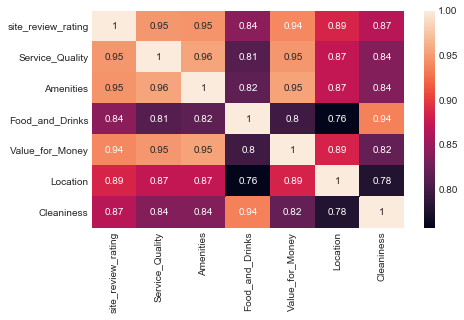

In [61]:
f, axarr = plt.subplots(1, 1, figsize=(7, 4))
f.subplots_adjust(hspace=1)

sns.heatmap(ratings_corr_mat, annot=True)

f.savefig('corr_indiv_n_overeall.png')

*From the heatmap above, the ratings have high correlation with each other. This does seem to line up with the expecation that customers do give high ratings to all categories iff they are overall pleased with the hotel.*

In [62]:
from statsmodels.formula.api import ols
model = ols(" site_review_rating ~ Service_Quality", data=ratings.dropna()).fit()

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     site_review_rating   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 2.134e+04
Date:                Tue, 22 May 2018   Prob (F-statistic):               0.00
Time:                        18:17:21   Log-Likelihood:                -252.52
No. Observations:                2416   AIC:                             509.0
Df Residuals:                    2414   BIC:                             520.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3718      0.024     15.641      0.000       0.325       0.418
Service_Quality     0.9111      0.006    146.087      0.000       0.899       0.923
==============================================================================
Omnibus:                     1090.830   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89340.480
Skew:                           1.231   Prob(JB):                         0.00
Kurtosis:                      32.689   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*The regression model underlies our expectation that customers are rating service quality very similar to the overall hotel rating.*

*The positive intercept underscores the residual impact of other factors that customers give even if service quality is poor.*

#### Predict hotel ratings from factors before review.

In [64]:
indian_hotels.hotel_category.value_counts()

regular    3871
gostays     129
Name: hotel_category, dtype: int64

In [65]:
#Map hotel category
category_map = {'regular':0, 'gostays':1}
indian_hotels_concat.replace({'hotel_category': category_map}, inplace=True)

In [66]:
indian_hotels_concat.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Telephone,Mirror,TV,Desk in Room,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,1,The standard check-in time is 12:00 PM and the...,...,True,True,True,True,3.9,3.7,3.8,4.1,4.0,4.1
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,True,True,True,False,4.7,4.7,4.3,4.7,4.8,4.8
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,True,True,False,True,2.5,2.5,1.0,2.5,2.5,1.0
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,True,False,False,False,5.0,5.0,5.0,5.0,5.0,5.0
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,True,True,False,False,2.7,2.6,2.5,2.9,2.9,2.6


In [67]:
#Create state dummies as a proxy for regional bias in hotel ratings
state_dummies = pd.get_dummies(indian_hotels_concat.state)

In [68]:
state_dummies.head()

,Andaman And Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Dadra And Nagar Haveli,Delhi,Goa,Gujarat,...,Pondicherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
indian_hotels_concat = pd.concat([indian_hotels_concat, state_dummies], axis=1)

In [70]:
indian_hotels_concat.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Pondicherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,1,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0


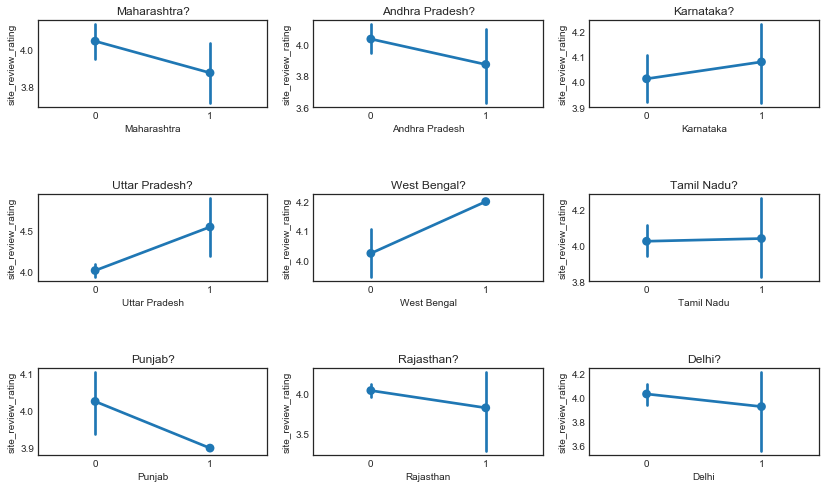

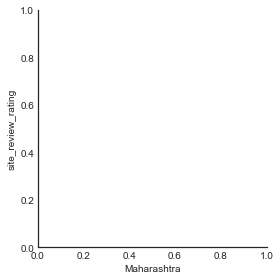

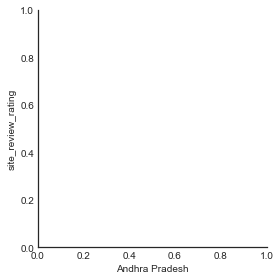

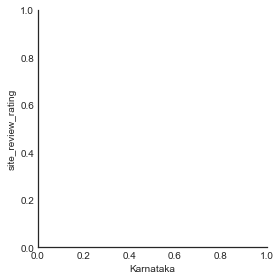

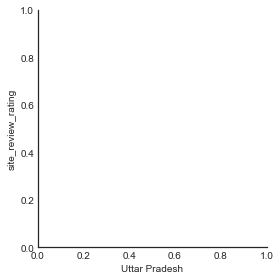

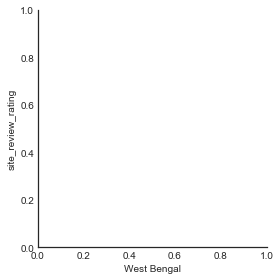

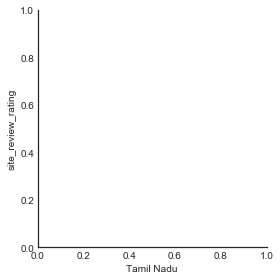

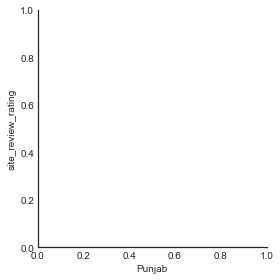

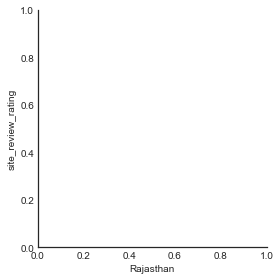

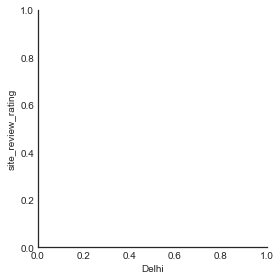

In [71]:
sns.set_style("white")

f, axarr = plt.subplots(3, 3, figsize=(14, 8))
f.subplots_adjust(hspace=1)

sns.factorplot(x='Maharashtra', y='site_review_rating', data=indian_hotels_concat.dropna(), ax=axarr[0][0])
axarr[0][0].set_title("Maharashtra?")

sns.factorplot(x='Andhra Pradesh', y='site_review_rating', 
               data=indian_hotels_concat.dropna(), ax=axarr[0][1])
axarr[0][1].set_title("Andhra Pradesh?")

sns.factorplot(x='Karnataka', y='site_review_rating', 
               data=indian_hotels_concat.dropna(), ax=axarr[0][2])
axarr[0][2].set_title("Karnataka?")

sns.factorplot(x='Uttar Pradesh', y='site_review_rating', 
               data=indian_hotels_concat.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Uttar Pradesh?")

sns.factorplot(x='West Bengal', y='site_review_rating', 
               data=indian_hotels_concat.dropna(), ax=axarr[1][1])
axarr[1][1].set_title("West Bengal?")

sns.factorplot(x='Tamil Nadu', y='site_review_rating', 
               data=indian_hotels_concat.dropna(), ax=axarr[1][2])
axarr[1][2].set_title("Tamil Nadu?")

sns.factorplot(x='Punjab', y='site_review_rating', 
               data=indian_hotels_concat.dropna(), ax=axarr[2][0])
axarr[2][0].set_title("Punjab?")

sns.factorplot(x='Rajasthan', y='site_review_rating', 
               data=indian_hotels_concat.dropna(), ax=axarr[2][1])
axarr[2][1].set_title("Rajasthan?")

sns.factorplot(x='Delhi', y='site_review_rating', 
               data=indian_hotels_concat.dropna(), ax=axarr[2][2])
axarr[2][2].set_title("Delhi?")

f.savefig('assets/state_corr_to_rating.png')

In [72]:
#Create property dummies as proxy for ratings givn to different hotel types
property_type_dummies = pd.get_dummies(indian_hotels_concat.property_type)

In [73]:
indian_hotels_concat = pd.concat([indian_hotels_concat, property_type_dummies], axis=1)

In [74]:
indian_hotels_concat.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,Hotel,Houseboat,Lodge,Luxury Yacht,Motel,Palace,Resort,Service Apartment,Tent,Villa
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,1,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,1,0,0,0
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,1,0,0,0
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,0,0,0,0,0,0,0,0,0,0
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,0,The standard check-in time is 12:00 PM and the...,...,1,0,0,0,0,0,0,0,0,0


In [75]:
indian_hotels.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id'],
      dtype='object')

In [76]:
#Create X,y
from sklearn.model_selection import train_test_split
data = indian_hotels_concat[['hotel_category', 'latitude', 'longitude', 'hotel_star_rating', 'image_count', 'room_count', 'site_review_count', 'site_review_rating']]
data = pd.concat([data, state_dummies, property_type_dummies, temp.select_dtypes(include='bool'), temp_hotel_amenities.select_dtypes(include='bool'), temp_info_amenities.select_dtypes(include='bool')], axis=1)
data.reset_index(drop=True, inplace=True)
data.dropna(inplace=True)
data.drop(data[data.hotel_star_rating == 0].index, inplace=True)
data.drop(data[data.site_review_count < 10].index, inplace=True)
X = data.drop('site_review_rating', axis=1)
y = data['site_review_rating']

In [77]:
data_corr = data.corr()

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 0 to 3997
Data columns (total 85 columns):
hotel_category                          1159 non-null int64
latitude                                1159 non-null float64
longitude                               1159 non-null float64
hotel_star_rating                       1159 non-null int64
image_count                             1159 non-null int64
room_count                              1159 non-null int64
site_review_count                       1159 non-null float64
Andaman And Nicobar Islands             1159 non-null uint8
Andhra Pradesh                          1159 non-null uint8
Arunachal Pradesh                       1159 non-null uint8
Assam                                   1159 non-null uint8
Bihar                                   1159 non-null uint8
Chhattisgarh                            1159 non-null uint8
Dadra And Nagar Haveli                  1159 non-null uint8
Delhi                                   1159 no

In [79]:
#Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [80]:
#Scale the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [81]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), linear_model.Ridge())

In [82]:
columns = X_train.columns
X_train_std = pd.DataFrame(ss.fit_transform(X_train[[name for name in columns]]))

In [83]:
X_train_std.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,-0.335673,0.151441,0.715695,1.200245,-0.363939,-0.024499,-0.526835,-0.076073,-0.210882,0.0,...,-1.284286,0.840993,-1.010411,0.660578,-1.085332,0.583994,0.863122,1.092906,1.840894,1.949642
1,-0.335673,-0.986283,-0.264519,-0.924018,-1.015729,-0.188416,-0.478931,-0.076073,-0.210882,0.0,...,-1.284286,-1.189071,0.989696,-1.513825,0.921377,-1.712345,-1.158585,1.092906,-0.543214,-0.512915
2,-0.335673,0.203301,-0.250587,0.138114,-0.870887,-0.044367,0.926256,-0.076073,-0.210882,0.0,...,-1.284286,-1.189071,0.989696,-1.513825,-1.085332,-1.712345,-1.158585,-0.914991,-0.543214,-0.512915
3,-0.335673,-1.034214,0.599936,0.138114,-0.074255,0.124517,-0.550787,-0.076073,-0.210882,0.0,...,0.778643,0.840993,0.989696,0.660578,0.921377,0.583994,0.863122,1.092906,1.840894,1.949642
4,-0.335673,-1.333009,-0.214192,0.138114,1.301746,-0.024499,-0.542803,-0.076073,-0.210882,0.0,...,-1.284286,0.840993,-1.010411,0.660578,-1.085332,0.583994,-1.158585,1.092906,-0.543214,-0.512915


#### Model using Ridge regression

In [84]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [85]:
pipe.score(X_train, y_train)

0.9997255964463956

In [86]:
from sklearn import linear_model
ridge_model = linear_model.Ridge()
ridge_model.fit(X_train_std, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
ridge_model.score(X_train_std, y_train)

0.2821591008215961

In [88]:
ridge_model.coef_

array([ 4.22114506e-02, -1.05924644e-01, -6.26479329e-02,  1.78732853e-01,
        1.94327452e-02, -8.95730250e-03,  4.42600533e-02,  2.46151611e-02,
       -3.28367854e-02,  0.00000000e+00,  3.95723571e-02, -1.73325318e-04,
        2.42363117e-02, -1.68914435e-02, -1.43627062e-02, -3.32942413e-02,
        4.08168586e-02,  2.34096001e-02,  4.34063634e-02,  3.36739507e-02,
        5.74069104e-03, -4.26855588e-02, -2.38323866e-02, -6.87529981e-03,
       -3.92009621e-02, -9.83545531e-05,  0.00000000e+00,  0.00000000e+00,
       -6.13169628e-03, -2.09715908e-02,  2.50831658e-02,  2.69903604e-02,
        8.79378570e-03, -1.07824799e-02,  0.00000000e+00,  0.00000000e+00,
        1.86414661e-03,  3.14451127e-03,  3.94584362e-02,  0.00000000e+00,
       -2.25233913e-02,  0.00000000e+00,  1.37533025e-02,  0.00000000e+00,
        2.05929041e-02,  7.16488362e-03,  1.23306255e-02, -7.10926392e-03,
        1.23457600e-02,  2.85438193e-02,  0.00000000e+00,  0.00000000e+00,
        7.40590806e-03, -

*Thats a very poor predictor for overall rating using Ridge regression*

#### Predict rating categories using Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
# As seen above during EDA, the rating distribution has positive kurtosis so need to give
# balanced weight to all classes
lgr = LogisticRegression(class_weight='balanced')

In [91]:
param_grid = [
    {'C': [C for C in [0.01, 0.1, 1, 10] ]  } ]

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
grid = GridSearchCV(lgr, param_grid, cv = 5)

In [94]:
y_train.head()

1633    4.0
2496    4.3
1906    3.9
3343    3.6
1564    4.1
Name: site_review_rating, dtype: float64

In [95]:
#For now doing a dummy categorization, might want to round these values later
#import numpy as np
y_train_categorized = round(y_train).astype('int32')

In [96]:
y_train_categorized.value_counts(sort=True)

4    698
3    122
5     40
2      9
Name: site_review_rating, dtype: int64

In [97]:
#Lets remove the 0 category due to its low count and set it to be category 1
y_train_categorized[y_train_categorized == 0 ] = 1

In [98]:
grid.fit(X_train_std, y_train_categorized)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
grid.score(X_train_std, y_train_categorized)

0.7756041426927502

In [101]:
predictions = grid.predict(X_train_std)
print(classification_report(y_train_categorized, predictions))

             precision    recall  f1-score   support

          2       0.22      0.89      0.35         9
          3       0.49      0.52      0.51       122
          4       0.90      0.84      0.87       698
          5       0.36      0.45      0.40        40

avg / total       0.81      0.78      0.79       869



In [102]:
confusion_matrix(y_train_categorized, predictions)

array([[  8,   1,   0,   0],
       [  6,  64,  49,   3],
       [ 22,  63, 584,  29],
       [  1,   2,  19,  18]])

*The Logistic regression gives a much better result on training result.*

In [103]:
grid.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [104]:
grid.best_estimator_.coef_

array([[-3.41236254e-01, -9.52253536e-02,  1.42851314e-01,
        -3.49359600e-01, -2.10765179e-01,  1.00042476e-02,
         2.49975889e-02, -2.45417190e-02,  1.54969064e-01,
         0.00000000e+00, -1.14452680e-01, -1.18488601e-02,
        -1.93473831e-02, -5.62617972e-02, -2.02578019e-01,
        -1.81743856e-01,  1.04192193e-01, -7.24403986e-02,
        -7.10516939e-02, -9.84944537e-02, -2.55504479e-02,
        -3.56842644e-01,  2.08353767e-01,  3.67109404e-01,
        -2.04154978e-01, -3.61208764e-02,  0.00000000e+00,
         0.00000000e+00, -1.03332504e-01, -3.57020614e-02,
         2.08386543e-02,  5.02066038e-01, -9.32364333e-02,
         3.39608920e-01,  0.00000000e+00,  0.00000000e+00,
         2.89797912e-02, -2.01213909e-01, -2.06771144e-01,
         0.00000000e+00,  1.73299715e-02,  0.00000000e+00,
        -5.66025614e-03,  0.00000000e+00, -3.27760990e-02,
        -1.24816069e-01, -6.93283494e-02,  1.41478783e-01,
         2.68025348e-02,  3.59044003e-02,  0.00000000e+0

In [106]:
y_test_categorized = round(y_test).astype('int32')

In [107]:
y_test_categorized.value_counts(sort=True, normalize=True)

4    0.810345
3    0.124138
5    0.051724
2    0.013793
Name: site_review_rating, dtype: float64

In [108]:
X_test_std = pd.DataFrame(ss.fit_transform(X_test))

In [109]:
X_test_std.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,-0.345964,0.544940,-1.015158,0.065259,0.237178,-0.539109,-0.354060,0.0,-0.16843,0.0,...,-1.251548,0.864285,-1.224745,-1.634285,-1.125000,-1.978700,0.828279,1.071517,1.898203,-0.526814
1,2.890474,0.995658,-0.032379,0.065259,0.304151,-0.486672,-0.542892,0.0,-0.16843,0.0,...,0.799011,0.864285,0.816497,0.611889,0.888889,0.505382,0.828279,1.071517,-0.526814,1.898203
2,-0.345964,0.226018,-0.360124,1.178496,-0.298608,-0.565328,2.336795,0.0,-0.16843,0.0,...,-1.251548,-1.157026,-1.224745,0.611889,0.888889,0.505382,-1.207322,1.071517,-0.526814,1.898203
3,-0.345964,1.737311,-0.776174,0.065259,-0.365581,-0.801296,-0.703399,0.0,-0.16843,0.0,...,0.799011,0.864285,-1.224745,0.611889,-1.125000,0.505382,0.828279,1.071517,-0.526814,-0.526814
4,-0.345964,1.498631,-0.242555,-1.047979,0.505071,-0.643984,1.402077,0.0,-0.16843,0.0,...,-1.251548,0.864285,-1.224745,-1.634285,0.888889,0.505382,0.828279,-0.933257,-0.526814,-0.526814


In [110]:
predictions_test = grid.predict(X_test_std)
print(classification_report(y_test_categorized, predictions_test))

             precision    recall  f1-score   support

          2       0.07      0.25      0.11         4
          3       0.28      0.36      0.31        36
          4       0.83      0.77      0.80       235
          5       0.00      0.00      0.00        15

avg / total       0.71      0.67      0.69       290



In [111]:
confusion_matrix(y_test_categorized, predictions_test)

array([[  1,   2,   1,   0],
       [  0,  13,  21,   2],
       [ 14,  31, 180,  10],
       [  0,   1,  14,   0]])

*The results are not as good as on the training set but still comparable*

In [112]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [113]:
rf_clf = RandomForestClassifier(class_weight= "balanced")

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
knn_clf = KNeighborsClassifier()

In [118]:
params = {'rf__min_weight_fraction_leaf': [0.01, 0.05, 0.10], 
           'lr__C': [0.1, 1, 10],
            'knn__n_neighbors': [5, 10, 20]}

In [119]:
voting_clf = VotingClassifier(estimators = [('rf', rf_clf), ('lr',lgr), ('knn', knn_clf)], voting = 'hard')

In [120]:
voting_clf.fit(X_train_std, y_train_categorized)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, ...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [121]:
voting_clf.score(X_train_std, y_train_categorized)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9136939010356732

In [122]:
voting_clf.score(X_test_std, y_test_categorized)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7965517241379311

In [123]:
X_train_std.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,-0.335673,0.151441,0.715695,1.200245,-0.363939,-0.024499,-0.526835,-0.076073,-0.210882,0.0,...,-1.284286,0.840993,-1.010411,0.660578,-1.085332,0.583994,0.863122,1.092906,1.840894,1.949642
1,-0.335673,-0.986283,-0.264519,-0.924018,-1.015729,-0.188416,-0.478931,-0.076073,-0.210882,0.0,...,-1.284286,-1.189071,0.989696,-1.513825,0.921377,-1.712345,-1.158585,1.092906,-0.543214,-0.512915
2,-0.335673,0.203301,-0.250587,0.138114,-0.870887,-0.044367,0.926256,-0.076073,-0.210882,0.0,...,-1.284286,-1.189071,0.989696,-1.513825,-1.085332,-1.712345,-1.158585,-0.914991,-0.543214,-0.512915
3,-0.335673,-1.034214,0.599936,0.138114,-0.074255,0.124517,-0.550787,-0.076073,-0.210882,0.0,...,0.778643,0.840993,0.989696,0.660578,0.921377,0.583994,0.863122,1.092906,1.840894,1.949642
4,-0.335673,-1.333009,-0.214192,0.138114,1.301746,-0.024499,-0.542803,-0.076073,-0.210882,0.0,...,-1.284286,0.840993,-1.010411,0.660578,-1.085332,0.583994,-1.158585,1.092906,-0.543214,-0.512915


In [124]:
y_train_categorized.head()

1633    4
2496    4
1906    4
3343    4
1564    4
Name: site_review_rating, dtype: int32

In [125]:
round(y).astype('int32').value_counts(normalize=True)

4    0.805004
3    0.136324
5    0.047455
2    0.011217
Name: site_review_rating, dtype: float64

In [126]:
grid = GridSearchCV(estimator=voting_clf, param_grid=params, cv=5)

In [127]:
grid.fit(X_train_std, y_train_categorized)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

GridSearchCV(cv=5, error_score='raise',
       estimator=VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
      ...       weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'rf__min_weight_fraction_leaf': [0.01, 0.05, 0.1], 'lr__C': [0.1, 1, 10], 'knn__n_neighbors': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [128]:
grid.score(X_train_std, y_train_categorized)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8285385500575374

In [129]:
grid.score(X_test_std, y_test_categorized)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7310344827586207

In [130]:
predictions_test = grid.predict(X_test_std)
print(classification_report(y_test_categorized, predictions_test))

             precision    recall  f1-score   support

          2       0.10      0.25      0.14         4
          3       0.24      0.19      0.22        36
          4       0.83      0.87      0.85       235
          5       0.00      0.00      0.00        15

avg / total       0.70      0.73      0.71       290



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [131]:
confusion_matrix(y_test_categorized, predictions_test)

array([[  1,   2,   1,   0],
       [  0,   7,  28,   1],
       [  9,  19, 204,   3],
       [  0,   1,  14,   0]])

In [132]:
y_train_del = y_train - y_train_categorized

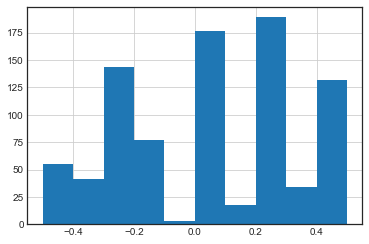

In [133]:
y_train_del.hist()

In [134]:
y_train_del.describe()

count    869.000000
mean       0.049252
std        0.287272
min       -0.500000
25%       -0.200000
50%        0.100000
75%        0.300000
max        0.500000
Name: site_review_rating, dtype: float64

In [135]:
y_train_del[y_train_del == -1] = 0

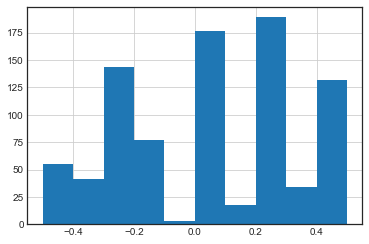

In [136]:
y_train_del.hist()

In [137]:
ridge_model_del = linear_model.Ridge()
ridge_model_del.fit(X_train_std, y_train_del)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [138]:
ridge_model_del.score(X_train_std, y_train_del)

0.12312804612757523

In [139]:
from sklearn.linear_model import Ridge

In [140]:
pipe_del = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [141]:
params_del = {'polynomialfeatures__degree': [2,3], 'ridge__alpha': [0.1, 1, 10]}

In [142]:
#grid_del = GridSearchCV(estimator=pipe_del, param_grid=params_del, cv=5)

In [143]:
#grid_del.fit(X_train, y_train_del)

In [144]:
#grid_del.score(X_train, y_train_del)

In [145]:
y_test_del = y_test - y_test_categorized

In [146]:
#y_test_del.hist()

In [147]:
#grid_del.score(X_test, y_test_del)

In [148]:
y_train_categorized[y_train_categorized != 4].value_counts(normalize=True)

3    0.713450
5    0.233918
2    0.052632
Name: site_review_rating, dtype: float64

In [149]:
X_train_std.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,-0.335673,0.151441,0.715695,1.200245,-0.363939,-0.024499,-0.526835,-0.076073,-0.210882,0.0,...,-1.284286,0.840993,-1.010411,0.660578,-1.085332,0.583994,0.863122,1.092906,1.840894,1.949642
1,-0.335673,-0.986283,-0.264519,-0.924018,-1.015729,-0.188416,-0.478931,-0.076073,-0.210882,0.0,...,-1.284286,-1.189071,0.989696,-1.513825,0.921377,-1.712345,-1.158585,1.092906,-0.543214,-0.512915
2,-0.335673,0.203301,-0.250587,0.138114,-0.870887,-0.044367,0.926256,-0.076073,-0.210882,0.0,...,-1.284286,-1.189071,0.989696,-1.513825,-1.085332,-1.712345,-1.158585,-0.914991,-0.543214,-0.512915
3,-0.335673,-1.034214,0.599936,0.138114,-0.074255,0.124517,-0.550787,-0.076073,-0.210882,0.0,...,0.778643,0.840993,0.989696,0.660578,0.921377,0.583994,0.863122,1.092906,1.840894,1.949642
4,-0.335673,-1.333009,-0.214192,0.138114,1.301746,-0.024499,-0.542803,-0.076073,-0.210882,0.0,...,-1.284286,0.840993,-1.010411,0.660578,-1.085332,0.583994,-1.158585,1.092906,-0.543214,-0.512915


In [150]:
y_train_categorized.head()

1633    4
2496    4
1906    4
3343    4
1564    4
Name: site_review_rating, dtype: int32

In [151]:
y_train_categorized.reset_index(drop=True, inplace=True)

In [152]:
y_train_categorized.describe()

count    869.000000
mean       3.884925
std        0.463523
min        2.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: site_review_rating, dtype: float64

In [153]:
data_filtered = pd.concat([X_train_std, y_train_categorized], axis=1)

In [154]:
data_filtered.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,site_review_rating
0,-0.335673,0.151441,0.715695,1.200245,-0.363939,-0.024499,-0.526835,-0.076073,-0.210882,0.0,...,0.840993,-1.010411,0.660578,-1.085332,0.583994,0.863122,1.092906,1.840894,1.949642,4
1,-0.335673,-0.986283,-0.264519,-0.924018,-1.015729,-0.188416,-0.478931,-0.076073,-0.210882,0.0,...,-1.189071,0.989696,-1.513825,0.921377,-1.712345,-1.158585,1.092906,-0.543214,-0.512915,4
2,-0.335673,0.203301,-0.250587,0.138114,-0.870887,-0.044367,0.926256,-0.076073,-0.210882,0.0,...,-1.189071,0.989696,-1.513825,-1.085332,-1.712345,-1.158585,-0.914991,-0.543214,-0.512915,4
3,-0.335673,-1.034214,0.599936,0.138114,-0.074255,0.124517,-0.550787,-0.076073,-0.210882,0.0,...,0.840993,0.989696,0.660578,0.921377,0.583994,0.863122,1.092906,1.840894,1.949642,4
4,-0.335673,-1.333009,-0.214192,0.138114,1.301746,-0.024499,-0.542803,-0.076073,-0.210882,0.0,...,0.840993,-1.010411,0.660578,-1.085332,0.583994,-1.158585,1.092906,-0.543214,-0.512915,4


In [155]:
data_filtered.drop(data_filtered[data_filtered.site_review_rating == 4].index, inplace=True)

In [156]:
X_filtered = data_filtered.drop('site_review_rating', axis=1)

In [157]:
y_filtered = data_filtered.site_review_rating

In [158]:
y_filtered.value_counts(normalize=True)

3    0.713450
5    0.233918
2    0.052632
Name: site_review_rating, dtype: float64

In [159]:
grid.fit(X_filtered, y_filtered)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

GridSearchCV(cv=5, error_score='raise',
       estimator=VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
      ...       weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'rf__min_weight_fraction_leaf': [0.01, 0.05, 0.1], 'lr__C': [0.1, 1, 10], 'knn__n_neighbors': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [160]:
grid.score(X_filtered, y_filtered)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9707602339181286

In [161]:
X_test_std.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,-0.345964,0.544940,-1.015158,0.065259,0.237178,-0.539109,-0.354060,0.0,-0.16843,0.0,...,-1.251548,0.864285,-1.224745,-1.634285,-1.125000,-1.978700,0.828279,1.071517,1.898203,-0.526814
1,2.890474,0.995658,-0.032379,0.065259,0.304151,-0.486672,-0.542892,0.0,-0.16843,0.0,...,0.799011,0.864285,0.816497,0.611889,0.888889,0.505382,0.828279,1.071517,-0.526814,1.898203
2,-0.345964,0.226018,-0.360124,1.178496,-0.298608,-0.565328,2.336795,0.0,-0.16843,0.0,...,-1.251548,-1.157026,-1.224745,0.611889,0.888889,0.505382,-1.207322,1.071517,-0.526814,1.898203
3,-0.345964,1.737311,-0.776174,0.065259,-0.365581,-0.801296,-0.703399,0.0,-0.16843,0.0,...,0.799011,0.864285,-1.224745,0.611889,-1.125000,0.505382,0.828279,1.071517,-0.526814,-0.526814
4,-0.345964,1.498631,-0.242555,-1.047979,0.505071,-0.643984,1.402077,0.0,-0.16843,0.0,...,-1.251548,0.864285,-1.224745,-1.634285,0.888889,0.505382,0.828279,-0.933257,-0.526814,-0.526814


In [162]:
y_test_categorized.head()

3546    4
1127    4
527     4
1297    4
2657    4
Name: site_review_rating, dtype: int32

In [163]:
y_test_categorized.reset_index(drop=True, inplace=True)

In [164]:
data_test_filtered = pd.concat([X_test_std, y_test_categorized], axis=1)

In [165]:
data_test_filtered.drop(data_test_filtered[data_test_filtered.site_review_rating == 4].index, inplace=True)

In [166]:
X_test_filtered = data_test_filtered.drop('site_review_rating', axis=1)

In [167]:
y_test_filtered = data_test_filtered.site_review_rating

In [168]:
y_test_filtered.value_counts(normalize=True)

3    0.654545
5    0.272727
2    0.072727
Name: site_review_rating, dtype: float64

In [169]:
grid.score(X_test_filtered, y_test_filtered)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6181818181818182

In [170]:
predictions_test_filtered = grid.predict(X_test_filtered)
print(classification_report(y_test_filtered, predictions_test_filtered))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00         4
          3       0.67      0.89      0.76        36
          5       0.40      0.13      0.20        15

avg / total       0.55      0.62      0.55        55



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [171]:
y_train_del_pos = y_train_del > 0

In [172]:
y_train_del_pos.value_counts(normalize=True)

True     0.515535
False    0.484465
Name: site_review_rating, dtype: float64

In [173]:
y_test_del_pos = y_test_del > 0

In [174]:
y_train_del_pos.value_counts(normalize=True)

True     0.515535
False    0.484465
Name: site_review_rating, dtype: float64

In [175]:
grid.fit(X_train_std, y_train_del_pos)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

GridSearchCV(cv=5, error_score='raise',
       estimator=VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
      ...       weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'rf__min_weight_fraction_leaf': [0.01, 0.05, 0.1], 'lr__C': [0.1, 1, 10], 'knn__n_neighbors': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [176]:
grid.score(X_train_std, y_train_del_pos)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6559263521288837

In [177]:
grid.score(X_test_std, y_test_del_pos)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5827586206896552

In [178]:
y_train_pos = y_train > 3.9

In [179]:
grid.fit(X_train_std, y_train_pos)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

GridSearchCV(cv=5, error_score='raise',
       estimator=VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
      ...       weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'rf__min_weight_fraction_leaf': [0.01, 0.05, 0.1], 'lr__C': [0.1, 1, 10], 'knn__n_neighbors': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [180]:
grid.score(X_train_std, y_train_pos)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7652474108170311

In [181]:
y_test_pos = y_test > 3.9

In [182]:
grid.score(X_test_std, y_test_pos)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6551724137931034

In [183]:
grid.best_params_

{'knn__n_neighbors': 20, 'lr__C': 0.1, 'rf__min_weight_fraction_leaf': 0.01}